นางสาวศิรภัสสร ประชุมชนะ 6410210302
https://colab.research.google.com/drive/1YRn_wwQLaDrj--16t0bczLHjmWnUrk1l?usp=sharing


In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_path = '/content/drive/MyDrive/344-331/Structured-2'

In [4]:
df_train_path ='/content/drive/MyDrive/344-331/Structured-2/train'
df_train = pd.DataFrame(os.listdir(df_train_path),columns=['Files_Name'])
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IMAGE_SIZE": 256,
    "class_names" : ['dancing','running','sleeping']
}
print(df_train)

  Files_Name
0    running
1   sleeping
2    dancing


In [5]:
df_test_path ='/content/drive/MyDrive/344-331/Structured-2/test'
df_test = pd.DataFrame(os.listdir(df_test_path),columns=['Files_Name'])
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IMAGE_SIZE": 256,
    "class_names" : ['dancing','running','sleeping']
}
print(df_test)

  Files_Name
0    dancing
1    running
2   sleeping


In [46]:
train_dir = '/content/drive/MyDrive/344-331/Structured-2/train'
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["class_names"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IMAGE_SIZE"],CONFIGURATION["IMAGE_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2142 files belonging to 3 classes.


In [47]:
len(train_ds)

67

In [8]:
def data_split(dataset,TRAIN_RATIO,VAL_RATIO):
    size=len(dataset)
    train_dataset=dataset.take(int(TRAIN_RATIO*size))
    val_dataset=dataset.skip(int(TRAIN_RATIO*size))
    val_dataset=val_dataset.take(int(VAL_RATIO*size))
    return train_dataset,val_dataset
train_ds,val_ds=data_split(train_ds,0.8,0.2)

In [9]:
len(train_ds)

53

In [10]:
test_dir = '/content/drive/MyDrive/344-331/Structured-2/test'
test_ds=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["class_names"],
    color_mode='rgb',
    batch_size=16,
    image_size=(CONFIGURATION["IMAGE_SIZE"],CONFIGURATION["IMAGE_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 378 files belonging to 3 classes.


In [11]:
len(test_ds)

24

In [13]:
import os
import pandas as pd
from PIL import Image

# ระบุที่อยู่ของโฟลเดอร์ที่มีไฟล์ภาพ
image_folder = '/content/drive/MyDrive/344-331/Structured-2/train'
output_csv_path = '/content/drive/MyDrive/344-331/Images_train.csv'

# ระบุ class_names
class_names = ['dancing','running','sleeping']

# สร้างรายการสำหรับเก็บข้อมูล
data = []

# วนลูปทุกรูปภาพ
for class_name in class_names:
    class_path = os.path.join(image_folder, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith('.jpg')]

    for image_file in image_files:
        # รับที่อยู่เต็มของไฟล์ภาพ
        image_path = os.path.join(class_path, image_file)

        # อ่านข้อมูลจากไฟล์ภาพ
        image_data = {'File_Name': image_file, 'Class_Name': class_name, 'Image_Path': image_path}

        # เพิ่มข้อมูลลงในรายการ
        data.append(image_data)

# แปลงรายการข้อมูลเป็น DataFrame
df_images = pd.DataFrame(data)

# บันทึก DataFrame เป็นไฟล์ CSV
df_images.to_csv(output_csv_path, index=False)


In [14]:
# ระบุที่อยู่ของโฟลเดอร์ที่มีไฟล์ภาพ
image_folder = '/content/drive/MyDrive/344-331/Structured-2/test'
output_csv_path = '/content/drive/MyDrive/344-331/Images_test.csv'

# ระบุ class_names
class_names = ['dancing','running','sleeping']

# สร้างรายการสำหรับเก็บข้อมูล
data = []

# วนลูปทุกรูปภาพ
for class_name in class_names:
    class_path = os.path.join(image_folder, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith('.jpg')]

    for image_file in image_files:
        # รับที่อยู่เต็มของไฟล์ภาพ
        image_path = os.path.join(class_path, image_file)

        # อ่านข้อมูลจากไฟล์ภาพ
        image_data = {'File_Name': image_file, 'Class_Name': class_name, 'Image_Path': image_path}

        # เพิ่มข้อมูลลงในรายการ
        data.append(image_data)

# แปลงรายการข้อมูลเป็น DataFrame
df_images = pd.DataFrame(data)

# บันทึก DataFrame เป็นไฟล์ CSV
df_images.to_csv(output_csv_path, index=False)


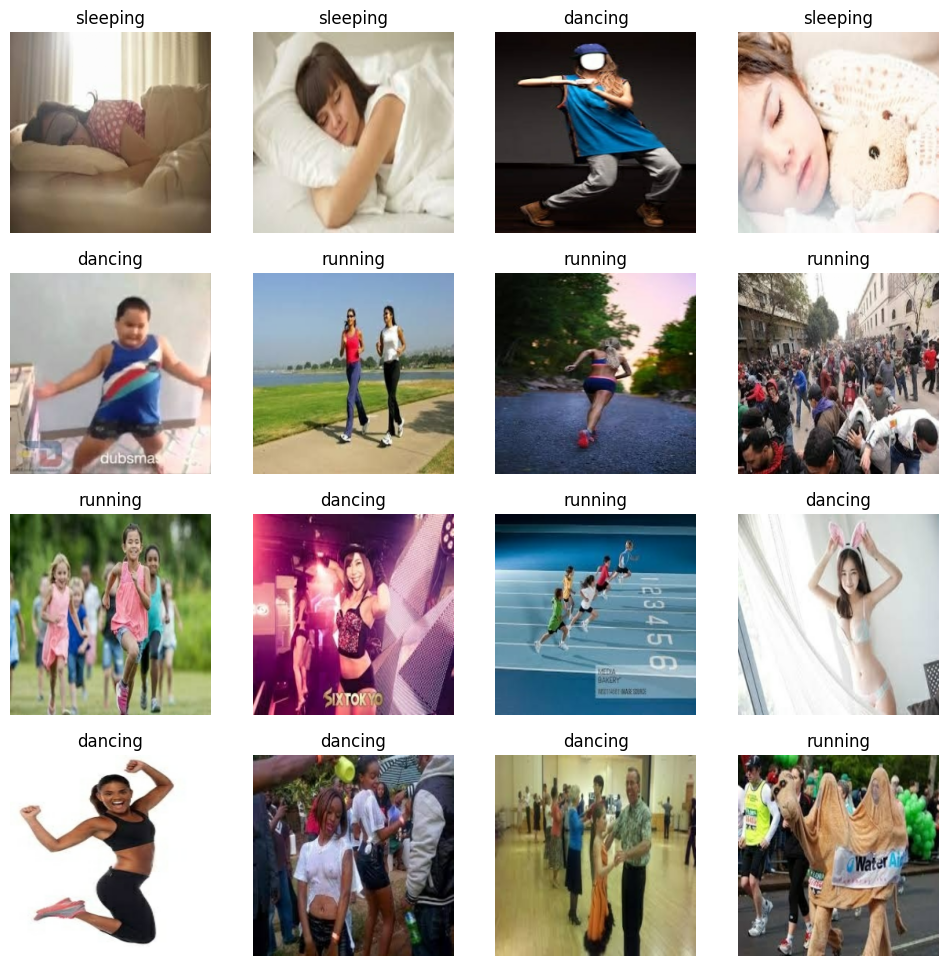

In [15]:
plt.figure(figsize=(12,12))
for images,labels in val_ds.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255.)
        plt.title(CONFIGURATION["class_names"][tf.argmax(labels[i],axis=0).numpy()])
        plt.axis("off")

##CNNs

Found 1716 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Epoch 1/10
54/54 [==============================] - 283s 5s/step - loss: 1.2943 - accuracy: 0.4347 - val_loss: 0.9205 - val_accuracy: 0.5635
Epoch 2/10
54/54 [==============================] - 277s 5s/step - loss: 0.9153 - accuracy: 0.5851 - val_loss: 0.7945 - val_accuracy: 0.6746
Epoch 3/10
54/54 [==============================] - 273s 5s/step - loss: 0.8037 - accuracy: 0.6614 - val_loss: 0.7085 - val_accuracy: 0.7249
Epoch 4/10
54/54 [==============================] - 271s 5s/step - loss: 0.7211 - accuracy: 0.7005 - val_loss: 0.7280 - val_accuracy: 0.7063
Epoch 5/10
54/54 [==============================] - 272s 5s/step - loss: 0.6496 - accuracy: 0.7360 - val_loss: 0.6268 - val_accuracy: 0.7328
Epoch 6/10
54/54 [==============================] - 278s 5s/step - loss: 0.6442 - accuracy: 0.7395 - val_loss: 0.6887 - val_accuracy: 0.7169
Epoch 7/10
54/54 [==============================] - 277s 5s/step - loss

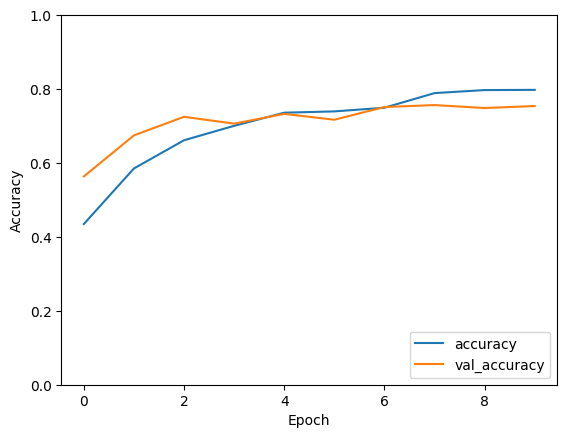

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IMAGE_SIZE": 256,
    "class_names" : ['dancing','running','sleeping']
}

train_dir = '/content/drive/MyDrive/344-331/Structured-2/train'
test_dir = '/content/drive/MyDrive/344-331/Structured-2/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    batch_size=CONFIGURATION["BATCH_SIZE"],
    class_mode='categorical',
    subset='training',
    classes=CONFIGURATION["class_names"]
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    seed=99,
    classes=CONFIGURATION["class_names"]
)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(CONFIGURATION["class_names"]), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 1s 604ms/step


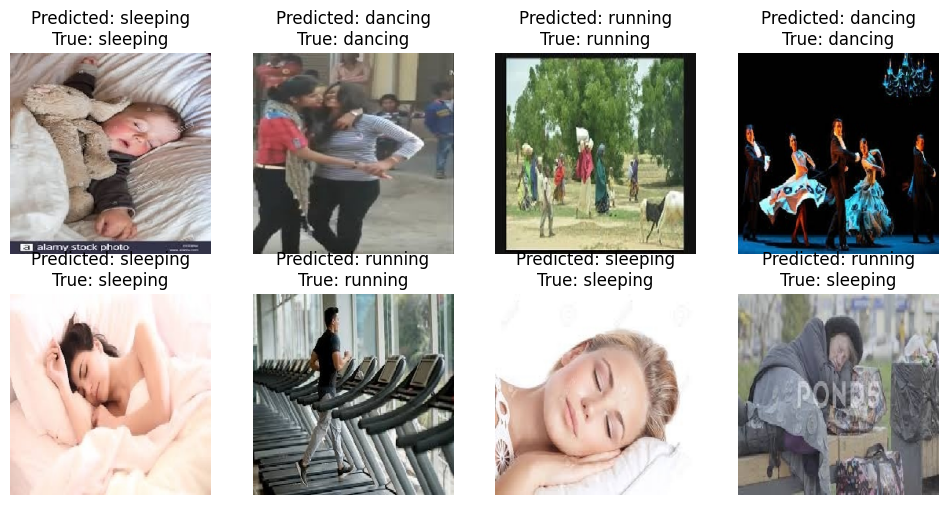

In [45]:
import numpy as np

plt.figure(figsize=(12, 12))

for images, labels in test_ds:

    predictions = model.predict(images)

    for i in range(min(len(images), 8)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])

        predicted_class_index = np.argmax(predictions[i])
        predicted_class_name = CONFIGURATION["class_names"][predicted_class_index]

        true_class_index = np.argmax(labels[i])
        true_class_name = CONFIGURATION["class_names"][true_class_index]

        plt.title(f'Predicted: {predicted_class_name}\nTrue: {true_class_name}')
        plt.axis("off")

    break

plt.show()


##Save & Load model

In [52]:
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/344-331/modelcnns.h5')
import pickle

# บันทึกโมเดล
with open('/content/drive/MyDrive/344-331/cnnmodel.pickle', 'wb') as file:
    pickle.dump(cnn_model, file)

# โหลดโมเดล
with open('/content/drive/MyDrive/344-331/cnnmodel.pickle', 'rb') as file:
    loaded_model = pickle.load(file)


##MobileNetV2

Found 2142 images belonging to 3 classes.
Found 378 images belonging to 3 classes.


Epoch 1/10
67/67 [==============================] - 151s 2s/step - loss: 0.5848 - accuracy: 0.7493 - val_loss: 0.3070 - val_accuracy: 0.8915
Epoch 2/10
67/67 [==============================] - 135s 2s/step - loss: 0.3029 - accuracy: 0.8926 - val_loss: 0.2493 - val_accuracy: 0.9180
Epoch 3/10
67/67 [==============================] - 133s 2s/step - loss: 0.2510 - accuracy: 0.9062 - val_loss: 0.2234 - val_accuracy: 0.9286
Epoch 4/10
67/67 [==============================] - 128s 2s/step - loss: 0.2212 - accuracy: 0.9206 - val_loss: 0.2684 - val_accuracy: 0.8968
Epoch 5/10
67/67 [==============================] - 130s 2s/step - loss: 0.2000 - accuracy: 0.9290 - val_loss: 0.2032 - val_accuracy: 0.9101
Epoch 6/10
67/67 [==============================] - 146s 2s/step - loss: 0.1821 - accuracy: 0.9379 - val_loss: 0.1941 - val_accuracy: 0.9259
Epoch 7/10
67/67 [==============================] - 131s 2s/step - loss: 0.1682 - accuracy: 0.9421 - val_loss: 0.2498 - val_accuracy: 0.8968
Epoch 8/10
67

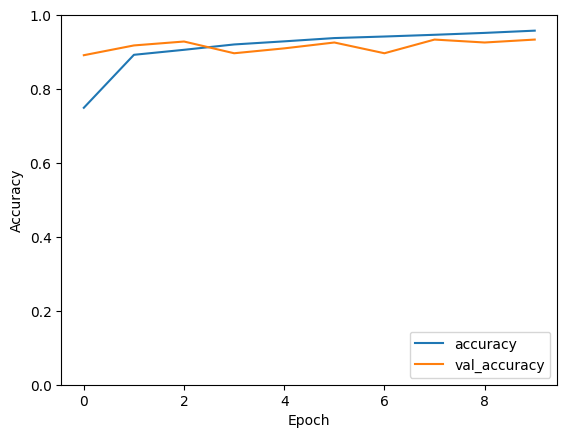

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import matplotlib.pyplot as plt

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IMAGE_SIZE": 256,
    "class_names": ['dancing','running','sleeping']
}

train_dir = '/content/drive/MyDrive/344-331/Structured-2/train'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    batch_size=CONFIGURATION["BATCH_SIZE"],
    class_mode='categorical',
    shuffle=True,
    seed=99,
    classes=CONFIGURATION["class_names"]
)

test_dir = '/content/drive/MyDrive/344-331/Structured-2/test'

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"]),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    seed=99,
    classes=CONFIGURATION["class_names"]
)

base_model = MobileNetV2(input_shape=(CONFIGURATION["IMAGE_SIZE"], CONFIGURATION["IMAGE_SIZE"], 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(CONFIGURATION["class_names"]), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [22]:
model.save_weights('/content/drive/MyDrive/344-331/model_mobileNetV2.h5')

24/24 [==============================] - 25s 1s/step


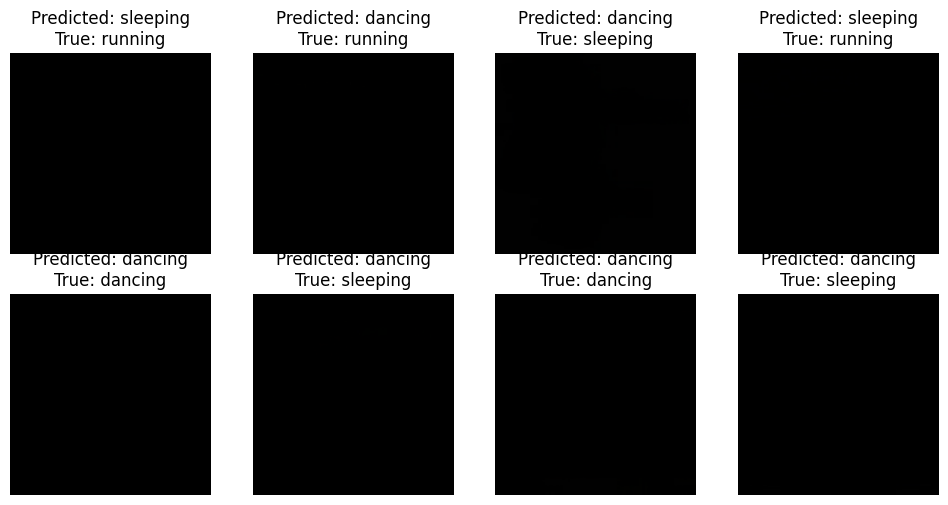

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(test_ds)

plt.figure(figsize=(12, 12))

images, labels = next(test_ds)

for i in range(min(len(images), 8)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i] / 255.)

    predicted_class_index = np.argmax(predictions[i])
    predicted_class_name = CONFIGURATION["class_names"][predicted_class_index]

    true_class_index = np.argmax(labels[i])
    true_class_name = CONFIGURATION["class_names"][true_class_index]

    plt.title(f'Predicted: {predicted_class_name}\nTrue: {true_class_name}')
    plt.axis("off")

plt.show()
